In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/idm/Dataset/salesdaily.csv')
df

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


In [7]:
df.shape

(2106, 13)

In [8]:
df.isna().sum()

datum           0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64

In [9]:
# Convert the 'datum' column to datetime
df['datum'] = pd.to_datetime(df['datum'])

df['day'] = df['datum'].dt.day
df

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name,day
0,2014-01-02,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday,2
1,2014-01-03,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday,3
2,2014-01-04,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday,4
3,2014-01-05,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday,5
4,2014-01-06,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2019-10-04,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday,4
2102,2019-10-05,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday,5
2103,2019-10-06,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday,6
2104,2019-10-07,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday,7


In [10]:
# Reshape the data to have separate columns for each category
melted_df = pd.melt(df, id_vars=['Year', 'Month'], value_vars=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'],
                    var_name='Category', value_name='Consumption')

# Group the data by Category and Month and calculate the total consumption
grouped_df = melted_df.groupby(['Category', 'Month']).sum().reset_index()


In [11]:
df[df['datum'].dt.month == 1]['M01AB'].sum()

929.1320833339998

In [12]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name,day
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday,2
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday,3
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday,4
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday,5
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday,6


In [13]:
# Reshape the dataframe
df_new = df.melt(id_vars=['datum', 'Year', 'Month', 'Hour', 'Weekday Name', 'day'],
             var_name='Drug',
             value_name='Quantity')

# Print the updated dataframe
df_new.head()

,datum,Year,Month,Hour,Weekday Name,day,Drug,Quantity
0,2014-01-02,2014,1,248,Thursday,2,M01AB,0.0
1,2014-01-03,2014,1,276,Friday,3,M01AB,8.0
2,2014-01-04,2014,1,276,Saturday,4,M01AB,2.0
3,2014-01-05,2014,1,276,Sunday,5,M01AB,4.0
4,2014-01-06,2014,1,276,Monday,6,M01AB,5.0


In [14]:
df_new.shape

(16848, 8)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
df_new['Weekday Name'] = le.fit_transform(df_new['Weekday Name'])
df_new['Drug'] = le.fit_transform(df_new['Drug'])
df_new

,datum,Year,Month,Hour,Weekday Name,day,Drug,Quantity
0,2014-01-02,2014,1,248,4,2,0,0.00
1,2014-01-03,2014,1,276,0,3,0,8.00
2,2014-01-04,2014,1,276,2,4,0,2.00
3,2014-01-05,2014,1,276,3,5,0,4.00
4,2014-01-06,2014,1,276,1,6,0,5.00
...,...,...,...,...,...,...,...,...
16843,2019-10-04,2019,10,276,0,4,7,1.00
16844,2019-10-05,2019,10,276,2,5,7,0.33
16845,2019-10-06,2019,10,276,3,6,7,4.20
16846,2019-10-07,2019,10,276,1,7,7,1.00


In [17]:
df_new.set_index('datum')

,Year,Month,Hour,Weekday Name,day,Drug,Quantity
datum,,,,,,,
2014-01-02,2014,1,248,4,2,0,0.00
2014-01-03,2014,1,276,0,3,0,8.00
2014-01-04,2014,1,276,2,4,0,2.00
2014-01-05,2014,1,276,3,5,0,4.00
2014-01-06,2014,1,276,1,6,0,5.00
...,...,...,...,...,...,...,...
2019-10-04,2019,10,276,0,4,7,1.00
2019-10-05,2019,10,276,2,5,7,0.33
2019-10-06,2019,10,276,3,6,7,4.20


In [18]:
train = df_new[df_new['Year'] < 2019]
test = df_new[df_new['Year'] >= 2019]

print(train.shape)
print(test.shape)

(14600, 8)
(2248, 8)


In [19]:
X_train = train.drop(['Hour','Quantity','datum'],axis = 1)
y_train = train['Quantity']

X_test = test.drop(['Hour','Quantity','datum'],axis = 1)
y_test = test['Quantity']


In [20]:
X_train

,Year,Month,Weekday Name,day,Drug
0,2014,1,4,2,0
1,2014,1,0,3,0
2,2014,1,2,4,0
3,2014,1,3,5,0
4,2014,1,1,6,0
...,...,...,...,...,...
16562,2018,12,4,27,7
16563,2018,12,0,28,7
16564,2018,12,2,29,7
16565,2018,12,3,30,7


In [21]:
### outliers detection and removel

In [22]:
Q1 = df_new['Quantity'].quantile(0.25)
Q3 = df_new['Quantity'].quantile(0.75)
Q1,Q3

(1.81775, 8.0)

In [23]:
IQR = Q3 - Q1
IQR

6.18225

In [24]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim,upper_lim

(-7.4556249999999995, 17.273375)

In [25]:
df_new_no_out = df_new[df_new['Quantity'] < 17.27]
df_new_no_out

,datum,Year,Month,Hour,Weekday Name,day,Drug,Quantity
0,2014-01-02,2014,1,248,4,2,0,0.00
1,2014-01-03,2014,1,276,0,3,0,8.00
2,2014-01-04,2014,1,276,2,4,0,2.00
3,2014-01-05,2014,1,276,3,5,0,4.00
4,2014-01-06,2014,1,276,1,6,0,5.00
...,...,...,...,...,...,...,...,...
16843,2019-10-04,2019,10,276,0,4,7,1.00
16844,2019-10-05,2019,10,276,2,5,7,0.33
16845,2019-10-06,2019,10,276,3,6,7,4.20
16846,2019-10-07,2019,10,276,1,7,7,1.00


In [26]:
train = df_new_no_out[df_new_no_out['Year'] < 2019]
test = df_new_no_out[df_new_no_out['Year'] >= 2019]

print(train.shape)
print(test.shape)

(12871, 8)
(2004, 8)


In [27]:
X_train = train.drop(['Hour','Quantity','datum'],axis = 1)
y_train = train['Quantity']

X_test = test.drop(['Hour','Quantity','datum'],axis = 1)
y_test = test['Quantity']

OLD LSTM


In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming df_new_no_out is the dataframe after removing outliers

# Extract the relevant columns for LSTM
lstm_data = df_new_no_out[['datum', 'Quantity']]
lstm_data = lstm_data.set_index('datum')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(lstm_data)

# Function to create LSTM dataset with time steps
def create_lstm_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

# Set the number of time steps
time_steps = 20

# Create LSTM dataset
X, y = create_lstm_dataset(scaled_data, time_steps)

# Reshape data for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], time_steps, 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.80)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Function to create LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    return model

# Create LSTM model with best parameters
model = create_lstm_model()
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Invert the scaling for predicted values
y_pred_original = scaler.inverse_transform(np.reshape(y_pred, (-1, 1)))

# Invert the scaling for actual values
y_test_original = scaler.inverse_transform(np.reshape(y_test, (-1, 1)))

# Calculate RMSE on the original scale
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
print("Test Root Mean Squared Error on Original Scale:", rmse_original)




Epoch 1/50
93/93 [==============================] - 4s 6ms/step - loss: 0.0303
Epoch 2/50
93/93 [==============================] - 1s 5ms/step - loss: 0.0280
Epoch 3/50
93/93 [==============================] - 1s 5ms/step - loss: 0.0279
Epoch 4/50
93/93 [==============================] - 1s 5ms/step - loss: 0.0278
Epoch 5/50
93/93 [==============================] - 1s 5ms/step - loss: 0.0278
Epoch 6/50
93/93 [==============================] - 1s 5ms/step - loss: 0.0278
Epoch 7/50
93/93 [==============================] - 0s 5ms/step - loss: 0.0277
Epoch 8/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0277
Epoch 9/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0276
Epoch 10/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0277
Epoch 11/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0277
Epoch 12/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0276
Epoch 13/50
93/93 [==============================

In [29]:
# Save the trained model
#model.save('/content/drive/MyDrive/Colab Notebooks/idm/Dataset/lstm_model.h5')
#print("Model saved successfully!")

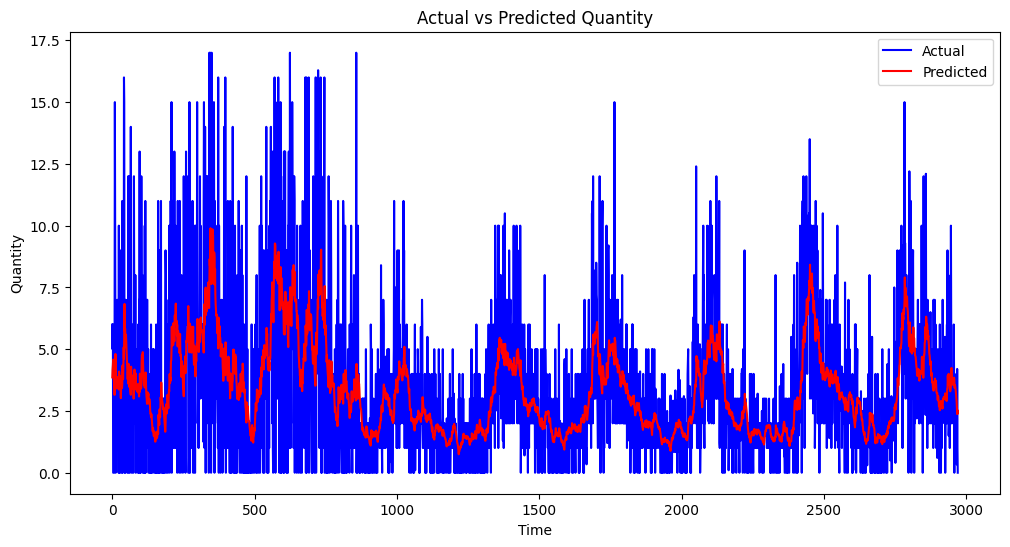

In [30]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(y_test_original, label='Actual', color='blue')

# Plot predicted values
plt.plot(y_pred_original, label='Predicted', color='red')

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Actual vs Predicted Quantity')
plt.legend()
plt.show()


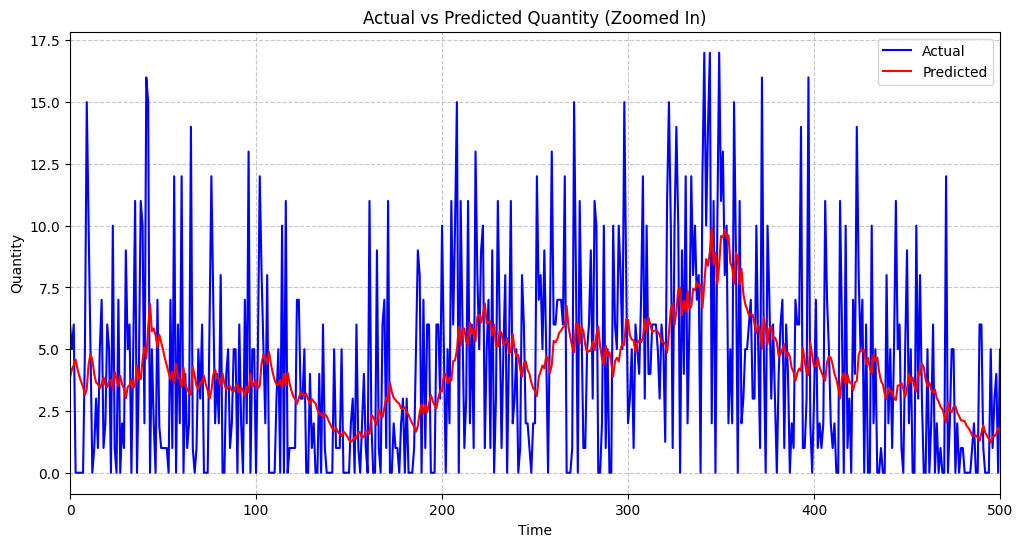

In [31]:
# Plot actual vs predicted values (zoomed-in)
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(y_test_original, label='Actual', color='blue')

# Plot predicted values
plt.plot(y_pred_original, label='Predicted', color='red')

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Actual vs Predicted Quantity (Zoomed In)')

# Set x-axis limits to zoom in
start_index = 0  # Adjust this index based on where you want to start the zoom
end_index = 500    # Adjust this index based on where you want to end the zoom
plt.xlim(start_index, end_index)

# Add grid lines for better readability (optional)
plt.grid(True, linestyle='--', alpha=0.7)

# Show legend
plt.legend()

# Show the plot
plt.show()


Number of features in X_lstm: 6
Epoch 1/10
335/335 [==============================] - 3s 5ms/step - loss: 0.0154 - val_loss: 0.0024
Epoch 2/10
335/335 [==============================] - 1s 4ms/step - loss: 1.6992e-04 - val_loss: 1.0859e-04
Epoch 3/10
335/335 [==============================] - 1s 4ms/step - loss: 3.5780e-05 - val_loss: 5.0307e-05
Epoch 4/10
335/335 [==============================] - 1s 4ms/step - loss: 2.0916e-05 - val_loss: 3.0759e-05
Epoch 5/10
335/335 [==============================] - 2s 6ms/step - loss: 1.4288e-05 - val_loss: 1.7344e-05
Epoch 6/10
335/335 [==============================] - 2s 6ms/step - loss: 1.1536e-05 - val_loss: 1.3526e-05
Epoch 7/10
335/335 [==============================] - 2s 5ms/step - loss: 9.9775e-06 - val_loss: 2.1252e-05
Epoch 8/10
335/335 [==============================] - 1s 4ms/step - loss: 1.2636e-05 - val_loss: 6.4141e-05
Epoch 9/10
335/335 [==============================] - 1s 4ms/step - loss: 1.0004e-05 - val_loss: 1.4869e-05
Epoc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


93/93 [==============================] - 0s 3ms/step
Test RMSE on the original scale: 0.044784916154706256


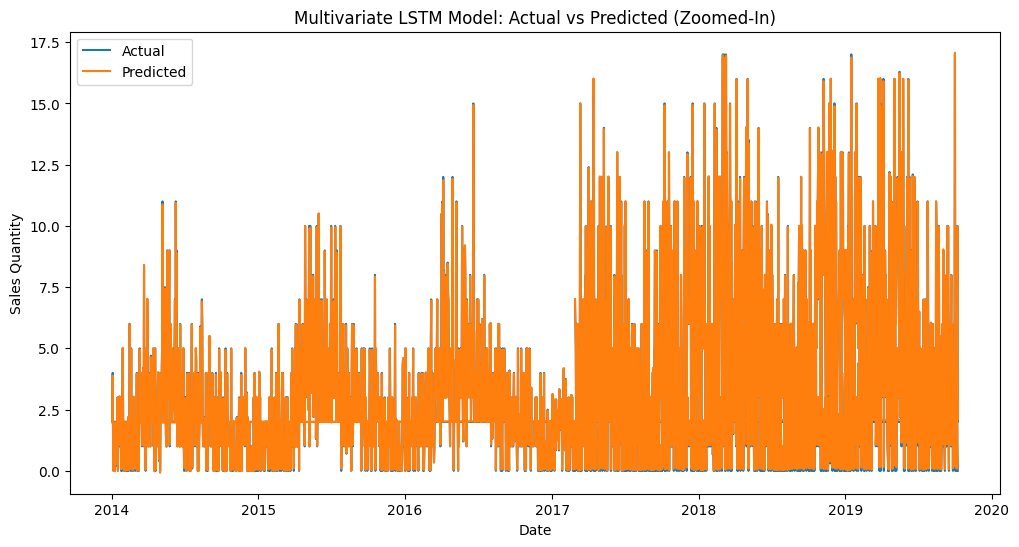

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib  # Import joblib for saving and loading scalers

# Load the preprocessed dataset without outliers
df_lstm = df_new_no_out.copy()

# Select relevant columns for multivariate time series
selected_columns_lstm = ['Year', 'Month', 'Weekday Name', 'day', 'Drug', 'Quantity']

# Set 'datum' column as the index
df_lstm['datum'] = pd.to_datetime(df_lstm['datum'])
df_lstm.set_index('datum', inplace=True)

# Separate scaler for input features (X)
scaler_X_lstm = MinMaxScaler()
df_X_lstm_scaled = scaler_X_lstm.fit_transform(df_lstm[selected_columns_lstm])

# Save the input feature scaler to a file
joblib.dump(scaler_X_lstm, '/content/drive/MyDrive/Colab Notebooks/idm/M/scaler_X_lstm.joblib')

# Separate scaler for output/target (y)
scaler_y_lstm = MinMaxScaler()
df_y_lstm_scaled = scaler_y_lstm.fit_transform(df_lstm[['Quantity']])

# Save the output scaler to a file
joblib.dump(scaler_y_lstm, '/content/drive/MyDrive/Colab Notebooks/idm/M/scaler_y_lstm.joblib')

# Combine X and y data using NumPy's concatenate
Xy_combined_scaled = np.concatenate((df_X_lstm_scaled, df_y_lstm_scaled), axis=1)

# Function to create sequences for input and output
def create_sequences_lstm(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length + 1):
        X.append(data[i:(i + sequence_length), :-1])
        y.append(data[i + sequence_length - 1, -1])
    return np.array(X), np.array(y)

# Define the sequence length and split the data into training and testing sets
sequence_length_lstm = 10  # Adjust as needed
X_lstm, y_lstm = create_sequences_lstm(Xy_combined_scaled, sequence_length_lstm)

# Print the number of features in the input data
print(f"Number of features in X_lstm: {X_lstm.shape[2]}")

# Split the data into training and testing sets
split_ratio_lstm = 0.8
split_index_lstm = int(split_ratio_lstm * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split_index_lstm], X_lstm[split_index_lstm:]
y_train_lstm, y_test_lstm = y_lstm[:split_index_lstm], y_lstm[split_index_lstm:]

# Reshape input data to be 3D [samples, timesteps, features]
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], sequence_length_lstm, X_train_lstm.shape[2])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], sequence_length_lstm, X_test_lstm.shape[2])

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(units=1, activation='linear'))  # Output layer has 1 unit for regression
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_split=0.1)

# Save the LSTM model to a file
model_lstm.save('/content/drive/MyDrive/Colab Notebooks/idm/M/lstm_model.h5')

# Make predictions on the test set
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Load the saved input feature scaler
scaler_X_lstm_loaded = joblib.load('/content/drive/MyDrive/Colab Notebooks/idm/M/scaler_X_lstm.joblib')

# Load the saved output scaler
scaler_y_lstm_loaded = joblib.load('/content/drive/MyDrive/Colab Notebooks/idm/M/scaler_y_lstm.joblib')

# Make predictions on the test set
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Use the original unscaled values for actual values
y_test_orig = df_lstm['Quantity'].values[-len(y_test_lstm):]

# Inverse transform the predictions
y_pred_inv_orig = scaler_y_lstm_loaded.inverse_transform(y_pred_lstm.reshape(-1, 1)).flatten()

# Calculate and print the Root Mean Squared Error (RMSE) on the original scale
rmse_lstm = np.sqrt(mean_squared_error(y_test_orig, y_pred_inv_orig))
print(f"Test RMSE on the original scale: {rmse_lstm}")

# Visualize the results (more zoomed-in plot)
plt.figure(figsize=(12, 6))
plt.plot(df_lstm.index[-len(y_test_orig):], y_test_orig, label='Actual')
plt.plot(df_lstm.index[-len(y_test_orig):], y_pred_inv_orig, label='Predicted')
plt.title('Multivariate LSTM Model: Actual vs Predicted (Zoomed-In)')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.show()


In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

def create_sequences_lstm(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length + 1):
        X.append(data[i:(i + sequence_length), :-1])
        y.append(data[i + sequence_length - 1, -1])
    return np.array(X), np.array(y)

def predict_sales(drug_category, start_date, end_date):
    # Load the LSTM model
    model_lstm = load_model('/content/drive/MyDrive/Colab Notebooks/idm/Dataset/lstm_model.h5')

    # Create a DataFrame for the date range of interest
    df_date_range = pd.date_range(start=start_date, end=end_date, freq='D').to_frame(name='datum')
    df_date_range['Drug'] = drug_category  # Set the specified drug category

    # Extract additional features from the date
    df_date_range['Year'] = df_date_range['datum'].dt.year
    df_date_range['Month'] = df_date_range['datum'].dt.month

    # Label encode 'Weekday Name'
    df_date_range['Weekday Name'] = df_date_range['datum'].dt.day_name()
    weekday_mapping = {'Monday': 6, 'Tuesday': 7, 'Wednesday': 8, 'Thursday': 2, 'Friday': 3, 'Saturday': 4, 'Sunday': 5}
    df_date_range['Weekday Name'] = df_date_range['Weekday Name'].map(weekday_mapping)

    df_date_range['day'] = df_date_range['datum'].dt.day

    # Load other features as needed and preprocess them (similar to training phase)

    # Prepare input features for prediction
    X_pred = df_date_range[['Year', 'Month', 'Weekday Name', 'day']].to_numpy()

    # Create new input feature scaler
    scaler_X_lstm_new = MinMaxScaler()

    # Scale input features with the new scaler
    X_pred_scaled = scaler_X_lstm_new.fit_transform(X_pred)

    # Concatenate the drug category column to the scaled input features
    X_pred_scaled_with_drug = np.concatenate((X_pred_scaled, np.full((X_pred_scaled.shape[0], 1), df_date_range['Drug'].astype('category').cat.codes[0])), axis=1)

    # Reshape input data to be 3D [samples, timesteps, features]
    X_pred_reshaped = np.reshape(X_pred_scaled_with_drug, (1, X_pred_scaled_with_drug.shape[0], X_pred_scaled_with_drug.shape[1]))

    # Make predictions on the new data
    y_pred = model_lstm.predict(X_pred_reshaped)

    # Create new output scaler
    scaler_y_lstm_new = MinMaxScaler()

    # Inverse transform the predictions to the original scale using the new output scaler
    y_pred_inv_orig = scaler_y_lstm_new.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    # Print or use the predicted quantities
    print("Predicted Quantities:")
    print(pd.DataFrame({'Date': df_date_range['datum'], 'Predicted Quantity': y_pred_inv_orig}))

    # Visualize the results (optional)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    plt.plot(df_date_range['datum'], y_pred_inv_orig, label='Predicted')
    plt.title(f'Multivariate LSTM Model: Predicted Quantities for {drug_category}')
    plt.xlabel('Date')
    plt.ylabel('Sales Quantity')
    plt.legend()
    plt.show()

# Example usage:
predict_sales('M01AB', '2022-01-01', '2022-01-10')


ValueError: ignored

In [49]:
# -*- coding: utf-8 -*-
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import joblib  # Import joblib for saving and loading scalers

# Assuming df_new_no_out is the dataframe after removing outliers

# Extract the relevant columns for LSTM
lstm_data = df_new_no_out[['datum', 'Quantity']]
lstm_data = lstm_data.set_index('datum')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(lstm_data)

# Function to create LSTM dataset with time steps
def create_lstm_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

# Set the number of time steps
time_steps = 20

# Create LSTM dataset
X, y = create_lstm_dataset(scaled_data, time_steps)

# Reshape data for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], time_steps, 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.80)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Function to create LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    return model

# Create LSTM model with best parameters
model = create_lstm_model()
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Invert the scaling for predicted values
y_pred_original = scaler.inverse_transform(np.reshape(y_pred, (-1, 1)))

# Invert the scaling for actual values
y_test_original = scaler.inverse_transform(np.reshape(y_test, (-1, 1)))

# Calculate RMSE on the original scale
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
print("Test Root Mean Squared Error on Original Scale:", rmse_original)

# Save the trained model
model.save('/content/drive/MyDrive/Colab Notebooks/idm/M/lstm_model.h5')
print("Model saved successfully!")

# Load the preprocessed dataset without outliers
df_lstm = df_new_no_out.copy()

# Remove the old univariate LSTM data
df_lstm.drop(['Quantity'], axis=1, inplace=True)

# Select relevant columns for multivariate time series
selected_columns_lstm = ['Year', 'Month', 'Weekday Name', 'day', 'Drug', 'Quantity']

# Set 'datum' column as the index
df_lstm['datum'] = pd.to_datetime(df_lstm['datum'])
df_lstm.set_index('datum', inplace=True)

# Label encode the 'Drug' category
le = LabelEncoder()
df_lstm['Drug'] = le.fit_transform(df_lstm['Drug'])

# Adjust the weekday mapping
df_lstm['Weekday Name'] = df_lstm['Weekday Name'].map({'Thursday': 2, 'Friday': 3, 'Saturday': 4, 'Sunday': 5, 'Monday': 6, 'Tuesday': 7, 'Wednesday': 8})

# Separate scaler for input features (X)
scaler_X_lstm = MinMaxScaler()
df_X_lstm_scaled = scaler_X_lstm.fit_transform(df_lstm[selected_columns_lstm])

# Save the input feature scaler to a file
joblib.dump(scaler_X_lstm, '/content/drive/MyDrive/Colab Notebooks/idm/M/scaler_X_lstm.joblib')

# Separate scaler for output/target (y)
scaler_y_lstm = MinMaxScaler()
df_y_lstm_scaled = scaler_y_lstm.fit_transform(df_lstm[['Quantity']])

# Save the output scaler to a file
joblib.dump(scaler_y_lstm, '/content/drive/MyDrive/Colab Notebooks/idm/M/scaler_y_lstm.joblib')

# Combine X and y data using NumPy's concatenate
Xy_combined_scaled = np.concatenate((df_X_lstm_scaled, df_y_lstm_scaled), axis=1)

# Function to create sequences for input and output
def create_sequences_lstm(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length + 1):
        X.append(data[i:(i + sequence_length), :-1])
        y.append(data[i + sequence_length - 1, -1])
    return np.array(X), np.array(y)

# Define the sequence length and split the data into training and testing sets
sequence_length_lstm = 10  # Adjust as needed
X_lstm, y_lstm = create_sequences_lstm(Xy_combined_scaled, sequence_length_lstm)

# Print the number of features in the input data
print(f"Number of features in X_lstm: {X_lstm.shape[2]}")

# Split the data into training and testing sets
split_ratio_lstm = 0.8
split_index_lstm = int(split_ratio_lstm * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split_index_lstm], X_lstm[split_index_lstm:]
y_train_lstm, y_test_lstm = y_lstm[:split_index_lstm], y_lstm[split_index_lstm:]

# Reshape input data to be 3D [samples, timesteps, features]
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], sequence_length_lstm, X_train_lstm.shape[2])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], sequence_length_lstm, X_test_lstm.shape[2])

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(units=1, activation='linear'))  # Output layer has 1 unit for regression
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_split=0.1)

# Save the LSTM model to a file
model_lstm.save('/content/drive/MyDrive/Colab Notebooks/idm/M/lstm_model.h5')

# Make predictions on the test set
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Load the saved input feature scaler
scaler_X_lstm_loaded = joblib.load('/content/drive/MyDrive/Colab Notebooks/idm/M/scaler_X_lstm.joblib')

# Load the saved output scaler
scaler_y_lstm_loaded = joblib.load('/content/drive/MyDrive/Colab Notebooks/idm/M/scaler_y_lstm.joblib')

# Predict with new data (update this section based on your specific needs)
drug_category = 'M01AB'
start_date = '2022-01-01'
end_date = '2022-01-10'

# Create a DataFrame for the date range of interest
df_date_range = pd.date_range(start=start_date, end=end_date, freq='D').to_frame(name='datum')
df_date_range['Drug'] = drug_category  # Set the specified drug category

# Extract additional features from the date
df_date_range['Year'] = df_date_range['datum'].dt.year
df_date_range['Month'] = df_date_range['datum'].dt.month

# Label encode 'Weekday Name'
df_date_range['Weekday Name'] = df_date_range['datum'].dt.day_name()
weekday_mapping = {'Thursday': 2, 'Friday': 3, 'Saturday': 4, 'Sunday': 5, 'Monday': 6, 'Tuesday': 7, 'Wednesday': 8}
df_date_range['Weekday Name'] = df_date_range['Weekday Name'].map(weekday_mapping)

df_date_range['day'] = df_date_range['datum'].dt.day

# Prepare input features for prediction
X_pred = df_date_range[['Year', 'Month', 'Weekday Name', 'day']].to_numpy()

# Encode the 'Drug' category consistently using the same LabelEncoder instance
drug_category_encoded = le.transform([drug_category])[0]

# Add the 'Drug' category feature to X_pred
X_pred = np.column_stack((X_pred, np.full((X_pred.shape[0], 1), drug_category_encoded)))

# Ensure that the number of features matches the input expected by the scaler
if X_pred.shape[1] != scaler_X_lstm_loaded.n_features_in_:
    raise ValueError(f"X_pred has {X_pred.shape[1]} features, but scaler is expecting {scaler_X_lstm_loaded.n_features_in_} features.")

X_pred_scaled = scaler_X_lstm_loaded.transform(X_pred)

# Reshape input data to be 3D [samples, timesteps, features]
X_pred_reshaped = np.reshape(X_pred_scaled, (1, X_pred_scaled.shape[0], X_pred_scaled.shape[1]))

# Make predictions on the new data
y_pred = model_lstm.predict(X_pred_reshaped)

# Inverse transform the predictions to the original scale using the original output scaler
y_pred_inv_orig = scaler_y_lstm_loaded.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Print or use the predicted quantities
print("Predicted Quantities:")
print(pd.DataFrame({'Date': df_date_range['datum'], 'Predicted Quantity': y_pred_inv_orig}))

# Visualize the results (optional)
plt.figure(figsize=(12, 6))
plt.plot(df_date_range['datum'], y_pred_inv_orig, label='Predicted')
plt.title(f'Multivariate LSTM Model: Predicted Quantities for {drug_category}')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.show()


Epoch 1/50
93/93 [==============================] - 2s 4ms/step - loss: 0.0310
Epoch 2/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0281
Epoch 3/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0278
Epoch 4/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0277
Epoch 5/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0277
Epoch 6/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0276
Epoch 7/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0277
Epoch 8/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0277
Epoch 9/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0276
Epoch 10/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0276
Epoch 11/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0276
Epoch 12/50
93/93 [==============================] - 0s 4ms/step - loss: 0.0276
Epoch 13/50
93/93 [==============================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully!


KeyError: ignored